Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3}
Balanced Accuracy: 0.5
AUC: 0.7674220272904483


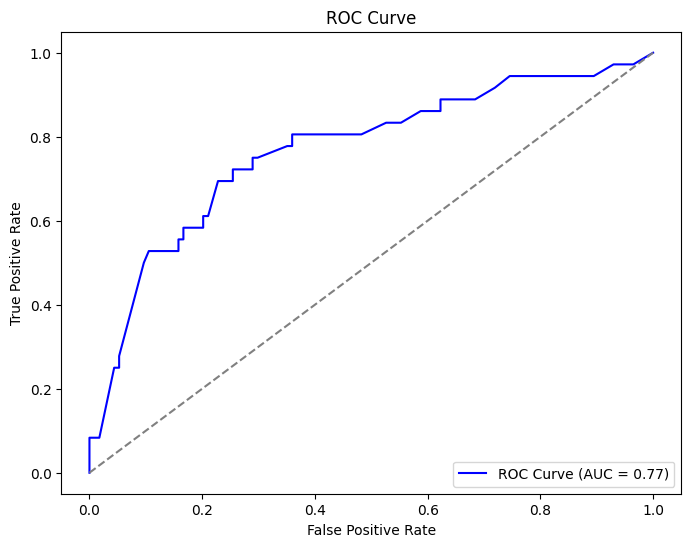

In [ ]:
# Data Science for Medicine and Biology
#
# Nezu Life Sciences
#
# Feel free to modify, redistribute and above all,
# create something with this code.
#
# Tiago Lopes, PhD
# March 2024

import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc, balanced_accuracy_score

# Load data
fileName = "https://raw.githubusercontent.com/Nezu-life/Data_Science_For_Medicine_and_Biology/main/datasets/blood_donation.csv"
data = pd.read_csv(fileName)

# Separate features and target
X = data.drop('Donated', axis=1)
y = data['Donated']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.3],
    'colsample_bytree': [0.5, 0.7]
}

# Set up cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
model = xgb.XGBClassifier(eval_metric='logloss')

# Grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='roc_auc', cv=skf, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test)
test_probabilities = best_model.predict_proba(X_test)[:, 1]

# Compute evaluation metrics
balanced_acc = balanced_accuracy_score(y_test, test_predictions)
roc_auc = auc(*roc_curve(y_test, test_probabilities)[:2])

# Output
print(f"Best Parameters: {best_params}")
print(f"Balanced Accuracy: {balanced_acc}")
print(f"AUC: {roc_auc}")

# Optional: Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, test_probabilities)

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.legend(loc='lower right')

plt.show()
